In [3]:
# Set warnings to "ignore" to keep the notebook clean
import warnings
warnings.filterwarnings("ignore")

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import jinja2
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import os

# import semi-cleaned data
df_cor = pd.read_csv("../3. Cleaned Data/JPtoEN_no_par.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\datat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\datat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df_cor.head(50)

,original,corrected,original_par,corrected_par
0,I will appreciate it if you correct my sentences.,I would appreciate it if you could correct my ...,NaN,NaN
1,The summer weather in Japan is not agreeable t...,I find Japan's summer weather disagreeable bec...,NaN,NaN
2,"So, as the winter is coming, I'm getting to fe...","So, as the winter is coming, I'm starting to f...",NaN,NaN
3,It is the very exciting season.,It is a very exciting season.,NaN,NaN
4,"But, before enjoying those kind of happy time,...","But, before enjoying those kind of happy times...",NaN,NaN
5,I have a fiancee and she is finding her job.,I have a fiancee and she is finding a job.(if ...,NaN,NaN
6,It seems not easy to find a job for women in J...,It doesn't seem easy for women to find jobs in...,NaN,NaN
7,"The first, most women have baby and they have ...","The first, most women have babies and they hav...",NaN,NaN
8,Employers don't like it even if maternity leav...,Employers don't like it even if maternity leav...,NaN,NaN
9,"The second, women workers likely to quit thei...","The second, women workers likely to quit thei...",NaN,NaN


In [21]:
import re

df_cor= df_cor[df_cor[["original", "corrected"]].applymap(lambda x: isinstance(x, str)).all(axis=1)]

df_cor["original"] = df_cor["original"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.,!?'\-\(\)\[\]…]+", "", x) if isinstance(x, str) else x)
df_cor["corrected"] = df_cor["corrected"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.,!?'\-\(\)\[\]…]+", "", x) if isinstance(x, str) else x)

df_cor['word_count_original']=df_cor['original'].apply(lambda x:len(x.split()))
df_cor['word_count_corrected']=df_cor['corrected'].apply(lambda x:len(x.split()))

In [22]:
df_cor.shape

(868173, 6)

In [23]:
df_cor[df_cor['word_count_corrected']/df_cor['word_count_original']>=2].count()

original                36957
corrected               36957
original_par                0
corrected_par               0
word_count_original     36957
word_count_corrected    36957
dtype: int64

In [26]:
df_cor['corrected'][5]

"I have a fiancee and she is finding a job.(if she doesn't have a job yet use a job, butif she has a job then use her job"

In [24]:
df_cor[df_cor['word_count_corrected']/df_cor['word_count_original']>=2].head(50) #.style.set_properties(subset=['original','corrected'], **{'width': '400px'})

,original,corrected,original_par,corrected_par,word_count_original,word_count_corrected
5,I have a fiancee and she is finding her job.,I have a fiancee and she is finding a job.(if ...,NaN,NaN,10,28
13,"When I was a child, I liked snowing.","When I was a child, I liked snow. Or...When I ...",NaN,NaN,8,18
40,"There is a variety of curry menu green,yellow,...","There is a variety of curry menus like green,y...",NaN,NaN,10,28
49,at the beach because I can forget various stre...,because I can forget various stressful things ...,NaN,NaN,11,24
67,Does the sentence I wrote above make sense?,Does the sentence I wrote above make sense? ye...,NaN,NaN,8,16
89,We went to eat the lunch in Itarian and chated...,We went to eat the lunch in Itarian and chated...,NaN,NaN,14,29
90,"And, I thought that a waiter was cool and very...","And, I thought that a waiter was cool and very...",NaN,NaN,11,23
95,I spent a happy weekend!,I spent a happy weekend! I had a wonderful wee...,NaN,NaN,5,10
120,"And, I went to buy product of hair care and sn...",And I bought hair care products and a snack. I...,NaN,NaN,11,33
122,"Finaly, I went to starbucks coffee and drank c...","Finaly, I went to Starbucks and drank coffee, ...",NaN,NaN,18,45


In [27]:
# create the new columns 'word_count_diff' to calculate the number of word count difference between corrected and original sentences
df_cor['word_count_diff']=df_cor['word_count_corrected']-df_cor['word_count_original']

# create the new columns 'word_count_ratio' to calculate the ratio of word count between corrected and original sentences
df_cor['word_count_ratio']=df_cor['word_count_corrected']/df_cor['word_count_original']

In [28]:
df_cor.describe()

,original_par,corrected_par,word_count_original,word_count_corrected,word_count_diff,word_count_ratio
count,0.0,0.0,868173.000000,868173.000000,868173.000000,8.681540e+05
mean,NaN,NaN,11.439372,12.769760,1.330388,inf
std,NaN,NaN,6.046989,7.815081,5.047381,NaN
min,NaN,NaN,0.000000,0.000000,-59.000000,0.000000e+00
25%,NaN,NaN,7.000000,8.000000,0.000000,1.000000e+00
50%,NaN,NaN,10.000000,11.000000,0.000000,1.000000e+00
75%,NaN,NaN,14.000000,16.000000,1.000000,1.166667e+00
max,NaN,NaN,134.000000,304.000000,281.000000,inf


In [30]:
# display the last 30 rows where word count ratio is higher than 1.25 and lower than 1.5
df_cor[(df_cor['word_count_ratio']>1.25)&(df_cor['word_count_ratio']<1.5)].tail(30).style.set_properties(subset=['original'], **{'width': '400px'})

,original,corrected,original_par,corrected_par,word_count_original,word_count_corrected,word_count_diff,word_count_ratio
868068,But still Im not sure what's kind of people are adequate for this.,I am unsure who would be the correct person to write the letter in order to fulfill this requirement.,nan,nan,13,19,6,1.461538
868104,People in highest position like King and queen had been buried in Kofuns.,People ranking the highest positions like King and queen had been buried in Kofuns for a long time.,nan,nan,13,18,5,1.384615
868122,Then how it will be your final testexam of the evaluation my outcome each year ?,Then how it will be your final testexam of the evaluation my outcome each year ?What is the final testexam like each year?,nan,nan,16,23,7,1.437500
868124,Sorry taking your time to answer my question and my not good English wiriting skill.,"Thank you for taking the time to answer my questions, I realize that my English writing skills are poor",nan,nan,15,19,4,1.266667
868150,I wanna improve speaking ability and enjoy talking with friends with joke.,I want to improve my speaking ability and enjoy talking with my friends and making jokes.,nan,nan,12,16,4,1.333333
868182,Most japanese people save subject.,Most japanese people save omit the subject.,nan,nan,5,7,2,1.400000
868191,"I engaged with children, I could communicate with staff nicely.","I was engaged with the children, and I could communicate with staff nicely.",nan,nan,10,13,3,1.300000
868192,"I engaged with children, I could communicate with staff nicely.","I was engaged with the children, and I could communicate with staff nicely.",nan,nan,10,13,3,1.300000
868202,"I am glad,I get a foreign country.",I am glad I got it from a foreign country.,nan,nan,7,10,3,1.428571
868250,I think that seeing movies in the theater is a big difference to watching TV.,I think that there is a big difference between watching movies at home and watching them in a theater.,nan,nan,15,19,4,1.266667


In [31]:
# filter the rows where word count ratio is more than 0.75 and less than 1.5
df_cor_filtered=df_cor[(df_cor['word_count_ratio']<1.5)&(df_cor['word_count_ratio']>0.75)]

In [32]:
df_cor_filtered.shape

(775749, 8)

<Axes: xlabel='word_count_diff', ylabel='Count'>

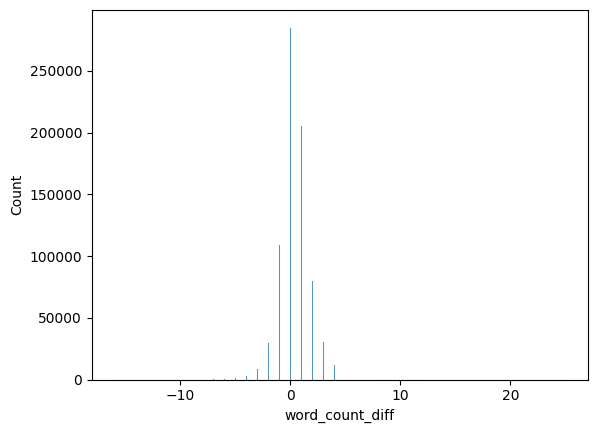

In [33]:
sns.histplot(data=df_cor_filtered,x='word_count_diff')

<Axes: xlabel='word_count_ratio', ylabel='Count'>

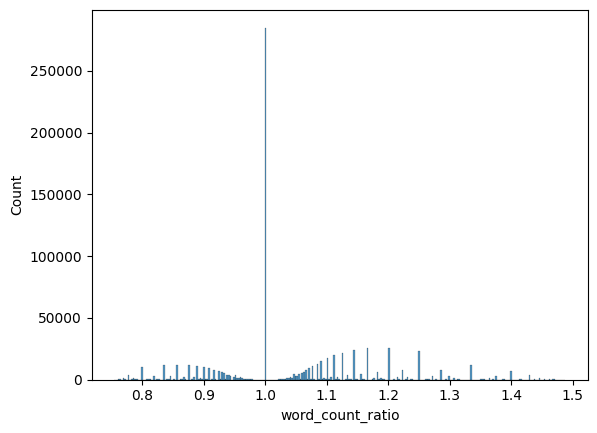

In [35]:
sns.histplot(data=df_cor_filtered,x='word_count_ratio')

In [39]:
# save csv file
df_cor_filtered.to_csv('../3. Cleaned Data/JPtoEN_clean_full.csv')